## Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [9]:
# Generating synthetic data
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(scale=.1, size=X.shape) # --> adding noise to the data

### LWR Algorithm

#### 1. Given Data:

* We have a dataset of  n  data points:

    * (x_1, y_1), (x_2, y_2), …, (x_n, y_n)


#### 2. Compute Weights for Each Query Point

* w_i = exp( - {(x_i - x_q)^2/(2tau^2)})
* where  tau  (bandwidth) controls how local the model is:
	* Small  tau  → More localized regression (overfitting risk).
	* Large  tau  → Smoother curve (underfitting risk).

#### 3. Fit a Weighted Linear Model

* We fit a weighted least squares regression at each query point  x_q :
* theta = (X^T W X)^{-1} X^T W y
* where:
	* X  is the design matrix with a bias term.
	* W  is the diagonal weight matrix:

#### 4. Predict  y_q  at  x_q 

* Once we have  theta , we compute:
* y_q = theta_0 + (theta_1 * x_q)  ---> line equation
* This gives the smoothed estimate at  x_q 



In [10]:
# Applying LWR (LOWESS)
tau = 0.2 
y_pred = lowess(y, X, frac=tau, it=3)[:,1]

In [11]:
y_pred

array([-0.11924238, -0.17511217, -0.23093442, -0.28670091, -0.34231481,
       -0.39760647, -0.45240088, -0.50643253, -0.55943774, -0.61114805,
       -0.65556858, -0.69667935, -0.73476383, -0.76966941, -0.80168524,
       -0.8303568 , -0.85468316, -0.87466587, -0.89137881, -0.90601533,
       -0.92019923, -0.93396987, -0.94631908, -0.95564913, -0.96074927,
       -0.96153578, -0.95915855, -0.95341367, -0.94330683, -0.92911651,
       -0.91080047, -0.88831403, -0.86159718, -0.82950669, -0.79158695,
       -0.7481934 , -0.70055182, -0.65022043, -0.59918112, -0.54751992,
       -0.49540539, -0.44278005, -0.39059979, -0.34003678, -0.29094291,
       -0.2418351 , -0.19153848, -0.14025631, -0.08813117, -0.03549353,
        0.01806342,  0.07243581,  0.12820331,  0.18596987,  0.24590956,
        0.30732402,  0.36895522,  0.42968297,  0.48773716,  0.54257586,
        0.59411496,  0.6430569 ,  0.69024921,  0.73639167,  0.78098101,
        0.82166152,  0.85712446,  0.88709456,  0.91135616,  0.93

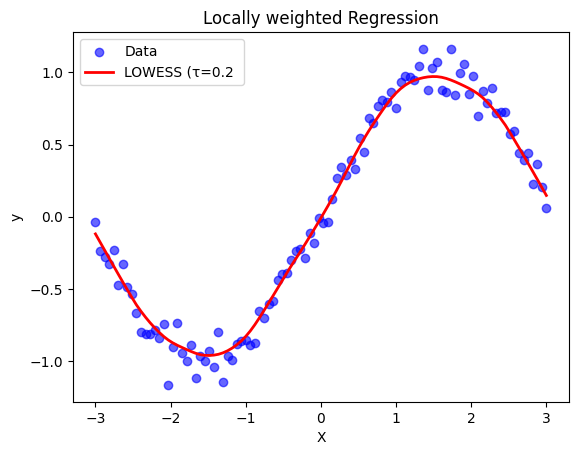

In [18]:
plt.scatter(X, y, label="Data", color='blue', alpha=.6)
plt.plot(X, y_pred, label=f"LOWESS (τ={tau} ", color='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Locally weighted Regression")
plt.show()